In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
import os
name_list = os.listdir('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据')

name_list.sort()

## 进出口贸易

In [69]:
data1 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_出口金额_季调1929-2020.xlsx')
data2 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_进口价格指数1983-2020.xlsx')
data3 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_出口价格指数1983-2020.xlsx')
data4 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_贸易差额_季调1992-2020 (1)_20201127141447.xlsx')
data5 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_国际支出 1980-2020_20201127141446.xlsx')
data6 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_GDP（年度数据1929-2020）.xlsx')

data1['时间'] = list(map(lambda x : x.split('-')[0],list(data1['时间'])))
data1 = data1.drop_duplicates(['时间'])
data2['时间'] = list(map(lambda x : x.split('-')[0],list(data2['时间'])))
data2 = data2.drop_duplicates(['时间'])
data3['时间'] = list(map(lambda x : x.split('-')[0],list(data3['时间'])))
data3 = data3.drop_duplicates(['时间'])
data4['时间'] = list(map(lambda x : x.split('-')[0],list(data4['时间'])))
data4 = data4.drop_duplicates(['时间'])
data5['时间'] = list(map(lambda x : x.split('-')[0],list(data5['时间'])))
data5 = data5.drop_duplicates(['时间'])
data6['时间'] = list(map(str,list(data6['时间'])))
data6 = data6.drop_duplicates(['时间'])

data = pd.merge(data1,data2,on = '时间')
data = pd.merge(data,data3,on = '时间')
data = pd.merge(data,data4,on = '时间')
data = pd.merge(data,data5,on = '时间')
data = pd.merge(data,data6,on = '时间')

data = data[['时间','美国:出口金额:季调','美国:进口金额:季调','美国:出口价格指数','美国:进口价格指数','美国:贸易差额:季调:同比','美国:GDP:现价']]

data.columns = ['time','output_money','input_money','output_rate','input_rate','Trade difference','GDP']

In [ ]:
data5

In [ ]:
data.to_excel('/Users/chenyeming/Downloads/new_data/input_output.xlsx')

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
def test(df):
    dfData = df.corr()
    plt.subplots(figsize=(9, 9)) # 设置画面大小
    sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
    plt.savefig('/Users/chenyeming/Downloads/new_data/input_output.svg',dpi = 600)
    plt.show()

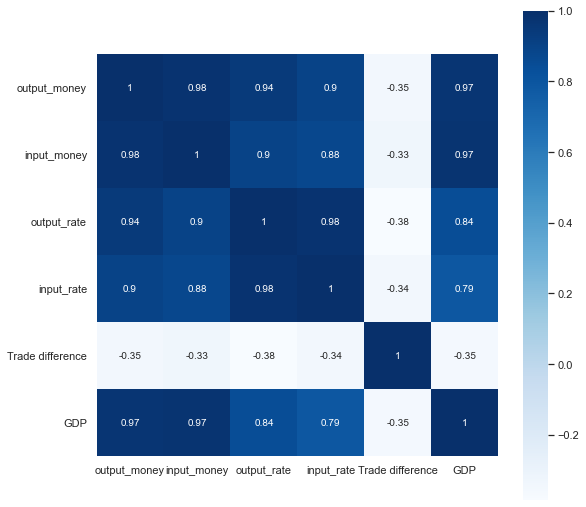

In [71]:
test(data)

## 货币政策

In [ ]:
name_list

In [ ]:
#对国内汇率 与外汇率 货币供应量

In [72]:
data1 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_货币供应量1980-2020.xlsx')
data2 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美元与主要币种汇率变化1980-2020.xlsx')
data3 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美元指数1980-2020.xlsx')
data4 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/期末汇率_1960-2020.xlsx')
data5 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_GDP（年度数据1929-2020）.xlsx')

data1['时间'] = list(map(lambda x : x.split('-')[0],list(data1['时间'])))
data1 = data1.drop_duplicates(['时间'])
data2['时间'] = list(map(lambda x : x.split('-')[0],list(data2['时间'])))
data2 = data2.drop_duplicates(['时间'])
data3['时间'] = list(map(lambda x : x.split('-')[0],list(data3['时间'])))
data3 = data3.drop_duplicates(['时间'])
data4['时间'] = list(map(lambda x : x.split('-')[0],list(data4['时间'])))
data4 = data4.drop_duplicates(['时间'])
data5['时间'] = list(map(str,list(data5['时间'])))
data5 = data5.drop_duplicates(['时间'])

data = pd.merge(data1,data3,on = '时间')
#data = pd.merge(data,data3,on = '时间')
data = pd.merge(data,data4,on = '时间')
data = pd.merge(data,data5,on = '时间')

#因为汇率的数据只到20年太好了，我们单独分析

data = data[['时间','美国:M1', '美国:M2','美元指数','美国:GDP:现价']]

data.columns = ['time','M1','M2','rate','GDP']

In [ ]:
data.to_excel('/Users/chenyeming/Downloads/new_data/money.xlsx')

            M1        M2      rate       GDP
M1    1.000000  0.976600 -0.085574  0.930703
M2    0.976600  1.000000 -0.157028  0.981305
rate -0.085574 -0.157028  1.000000 -0.206219
GDP   0.930703  0.981305 -0.206219  1.000000


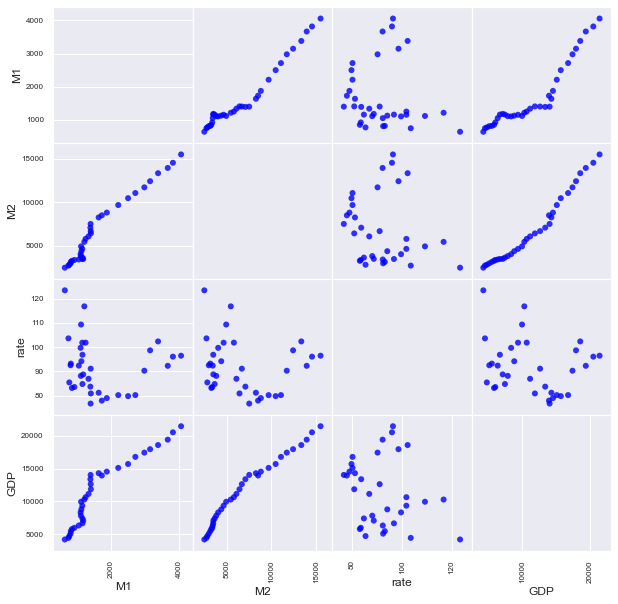

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns; sns.set()
%matplotlib inline
# 相关性计算
print(data.corr())
# 绘图
fig = pd.plotting.scatter_matrix(data,figsize=(10,10),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'
plt.savefig('/Users/chenyeming/Downloads/new_data/money.svg')
plt.show()

In [59]:
#####归一化函数#####
max_min_scaler = lambda x : (x-np.min(x))/(np.max(x)-np.min(x))

In [74]:
data_tmp1 = data2[['时间','美元兑人民币元']]
data_tmp1['币种'] = 'cny'
data_tmp1.columns = ['time','rate','type']
data_tmp1['rate'] = data_tmp1[['rate']].apply(max_min_scaler)

data_tmp2 = data2[['时间','美元兑日元']]
data_tmp2['币种'] = 'jap'
data_tmp2.columns = ['time','rate','type']
data_tmp2['rate'] = data_tmp2[['rate']].apply(max_min_scaler)

data_tmp3 = data2[['时间','欧元兑美元']]
data_tmp3['币种'] = 'eur'
data_tmp3.columns = ['time','rate','type']
data_tmp3['rate'] = list(map(lambda x: 1/x,list(data_tmp3['rate'])))
data_tmp3['rate'] = data_tmp3[['rate']].apply(max_min_scaler)

data_tmp = pd.concat([data_tmp1,data_tmp2,data_tmp3],axis=0)

data_tmp['time'] = list(map(int,list(data_tmp['time'])))

<ipython-input-74-effa0c5d089d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tmp1['币种'] = 'cny'
<ipython-input-74-effa0c5d089d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tmp1['rate'] = data_tmp1[['rate']].apply(max_min_scaler)
<ipython-input-74-effa0c5d089d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

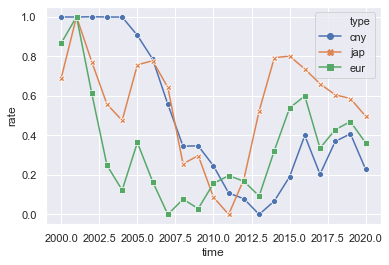

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

from sklearn.datasets import load_diabetes


sns.lineplot(x="time", y="rate",hue="type", style="type", markers=True, dashes=False, data=data_tmp)
plt.savefig('/Users/chenyeming/Downloads/new_data/money2.svg')
plt.show()

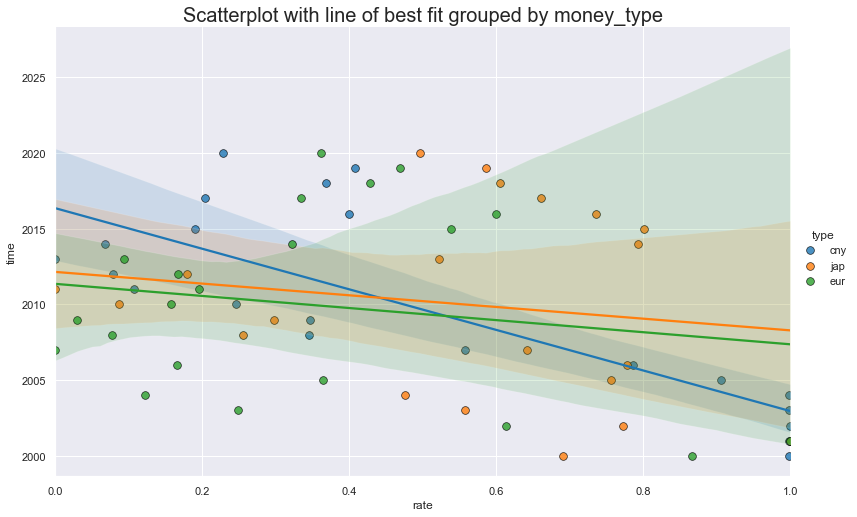

In [76]:
# Plot

import seaborn as sns; sns.set()
%matplotlib inline
gridobj = sns.lmplot(x="rate", y="time", hue="type", data=data_tmp,

                     height=7, aspect=1.6, robust=True, palette='tab10',

                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))



# Decorations

#gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))

plt.title("Scatterplot with line of best fit grouped by money_type", fontsize=20)
plt.savefig('/Users/chenyeming/Downloads/new_data/money3.svg')
plt.show()

## 金融市场

In [ ]:
name_list

In [64]:
data1 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_30年期抵押贷款固定利率1980-2020.xlsx')
data2 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_商业银行利率1980-2020.xlsx')
data3 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_国债收益率1980-2020.xlsx')
#data4 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_股票市场1980-2020.xlsx')
data5 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_GDP（年度数据1929-2020）.xlsx')

data1['时间'] = list(map(lambda x : x.split('-')[0],list(data1['时间'])))
data1 = data1.drop_duplicates(['时间'])
data2['时间'] = list(map(lambda x : x.split('-')[0],list(data2['时间'])))
data2 = data2.drop_duplicates(['时间'])
data3['时间'] = list(map(lambda x : x.split('-')[0],list(data3['时间'])))
data3 = data3.drop_duplicates(['时间'])
data5['时间'] = list(map(str,list(data5['时间'])))
data5 = data5.drop_duplicates(['时间'])

data = pd.merge(data1,data2,on = '时间')
#data = pd.merge(data,data3,on = '时间')
data = pd.merge(data,data3,on = '时间')
data = pd.merge(data,data5,on = '时间')

#因为汇率的数据只到20年太好了，我们单独分析

data = data[['时间','美国:30年期抵押贷款固定利率','美国:国债收益率:1年','美国:商业银行全部帐户利率','美国:GDP:现价']]

data.columns = ['time','loan','nation','bank','GDP']

data.dropna(inplace =True)

data['loan'] = data[['loan']].apply(max_min_scaler)
data['nation'] = data[['nation']].apply(max_min_scaler)
data['bank'] = data[['bank']].apply(max_min_scaler)

In [ ]:
data.to_excel('/Users/chenyeming/Downloads/new_data/finance.xlsx')

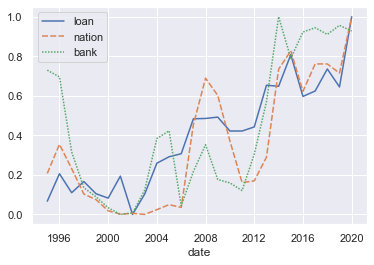

In [68]:
import numpy as np
import pandas as pd;
import matplotlib.pyplot as plt
# 构建 时间序列数据 从2000-1-31开始，以月份为间隔，构建100条记录
data_value = np.array(data.iloc[:,1:4])
index = pd.date_range("1994", periods=len(data['time']),freq="y", name="date")

# 构建5列数据，列名分别为data a b c d
wide_df = pd.DataFrame(data_value, index, ["loan", "nation", "bank"])
"""
案例7：绘制时间序列数据
"""
sns.lineplot(data=wide_df)
plt.savefig('/Users/chenyeming/Downloads/new_data/finance.svg')
plt.show()

#### 股票可以考虑单独分析

## 农业、能源、零售业、工业

In [ ]:
name_list

In [77]:
data1 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/农林牧渔总产值_1960-2020.xlsx')
data2 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/社会消费品零售总额_1960-2020.xlsx')
data3 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_全部制造业1980-2020.xlsx')
#data4 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_工业产出指数1980-2020.xlsx')
data5 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/能源消费总量_1960-2020.xlsx')
data6 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_GDP（年度数据1929-2020）.xlsx')

data1['时间'] = list(map(str,list(data1['时间'])))
data1 = data1.drop_duplicates(['时间'])
data2['时间'] = list(map(lambda x : x.split('-')[0],list(data2['时间'])))
data2 = data2.drop_duplicates(['时间'])
data3['时间'] = list(map(lambda x : x.split('-')[0],list(data3['时间'])))
data3 = data3.drop_duplicates(['时间'])
data5['时间'] = list(map(str,list(data5['时间'])))
data5 = data5.drop_duplicates(['时间'])
data6['时间'] = list(map(str,list(data6['时间'])))
data6 = data6.drop_duplicates(['时间'])

data = pd.merge(data1,data2,on = '时间')
data = pd.merge(data,data3,on = '时间')
#data = pd.merge(data,data4,on = '时间')
data = pd.merge(data,data5,on = '时间')
data = pd.merge(data,data6,on = '时间')

data = data[['时间','农林牧渔总产值','社会消费品零售总额:累计值','美国:全部制造业除国防外:出货量','能源消费总量','美国:GDP:现价']]

data.columns = ['time','agriculture','retail','manufacturing','energy','gdp']

data['total'] = np.sum(np.array(data.iloc[:,1:5]),1)

In [24]:
data.to_excel('/Users/chenyeming/Downloads/new_data/industry.xlsx')

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

data['total'] = np.sum(np.array(data.iloc[:,1:5]),1)
data['total2'] = np.sum(np.array(data.iloc[:,1:4]),1)
data['total3'] = np.sum(np.array(data.iloc[:,1:3]),1)
data['total4'] = np.sum(np.array(data.iloc[:,1:2]),1)

data_tmp = data
sns.set(style="whitegrid")
#设置子图的大小
f, ax = plt.subplots(figsize=(15, 12))
#导入数据集car crash dataset
crashes = data_tmp.sort_values("total", ascending=False)
sns.set_color_codes("pastel")
sns.barplot(x="time", y="total", data=data_tmp,
label="energy", color="b")
sns.set_color_codes("muted")
sns.barplot(x="time", y="total2", data=data_tmp,
label="manufacturing", color="b")
sns.set_color_codes("deep")
sns.barplot(x="time", y="total3", data=data_tmp,
label="retail", color="b")
sns.set_color_codes("dark")
sns.barplot(x="time", y="total4", data=data_tmp,
label="agriculture", color="b")
#设置图例和坐标信息
ax.legend(ncol=2, loc="lower right", frameon=True)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Growth Rate', fontsize=15)
plt.title('Distribution of the growth rate of the four factors',fontsize = 18)
sns.despine(left=True, bottom=True)
plt.legend(loc = 'best')
plt.savefig('/Users/chenyeming/Downloads/new_data/industry.svg')
plt.show()

NameError: name 'np' is not defined

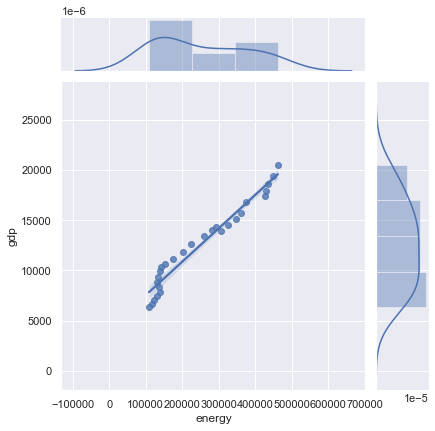

In [80]:
sns.set()
sns.jointplot(x = 'energy', y = 'gdp', data = data_tmp ,kind = 'reg')
plt.savefig('/Users/chenyeming/Downloads/new_data/industry2.svg')

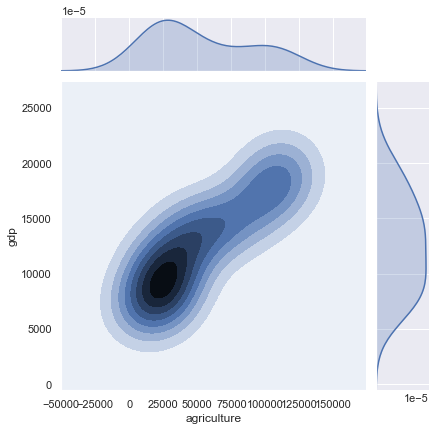

In [81]:
sns.jointplot(x = 'agriculture', y = 'gdp', data = data_tmp ,kind = 'kde')
plt.savefig('/Users/chenyeming/Downloads/new_data/industry3.svg')

## covid-19

In [ ]:
data = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_GDP（年度数据1929-2020）.xlsx')

data['时间'] = list(map(str,list(data['时间'])))
data = data.drop_duplicates(['时间'])
data = data[['时间','美国:GDP:现价']]

In [ ]:
#gdp根本没有20年的数据目前
#所以我们分析covid-19.我们可以将其作为一个黑天鹅事件？ 找个形式来表示？ 噪声？扰动？之类的？

## 就业

In [82]:
data1 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_个人收入和支出1980-2020.xlsx')
data2 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_失业率1980-2020.xlsx')
data3 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_就业人数_1980-2020.xlsx')
data4 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_GDP（年度数据1929-2020）.xlsx')


data1['时间'] = list(map(lambda x : x.split('-')[0],list(data1['时间'])))
data1 = data1.drop_duplicates(['时间'])
data2['时间'] = list(map(lambda x : x.split('-')[0],list(data2['时间'])))
data2 = data2.drop_duplicates(['时间'])
data3['时间'] = list(map(lambda x : x.split('-')[0],list(data3['时间'])))
data3 = data3.drop_duplicates(['时间'])
data4['时间'] = list(map(str,list(data4['时间'])))
data4 = data4.drop_duplicates(['时间'])


data = pd.merge(data1,data2,on = '时间')
data = pd.merge(data,data3,on = '时间')
data = pd.merge(data,data4,on = '时间')

data = data[['时间','美国:个人总收入:季调','美国:失业率:季调','美国:GDP:现价']]
data.columns = ['time','wage','loss_rate','gdp']

In [29]:
data.to_excel('/Users/chenyeming/Downloads/new_data/work.xlsx')

In [83]:
import copy
data_tmp = copy.deepcopy(data)
data_tmp['time'] = list(map(int,list(data_tmp['time'])))
data_tmp = data_tmp.sort_values(by="time" , ascending=True) 

<ipython-input-87-e766085934db>:21: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  ax2.plot(x, y2, 'r',ms=20,linewidth=3,marker = '*',markersize = 10)


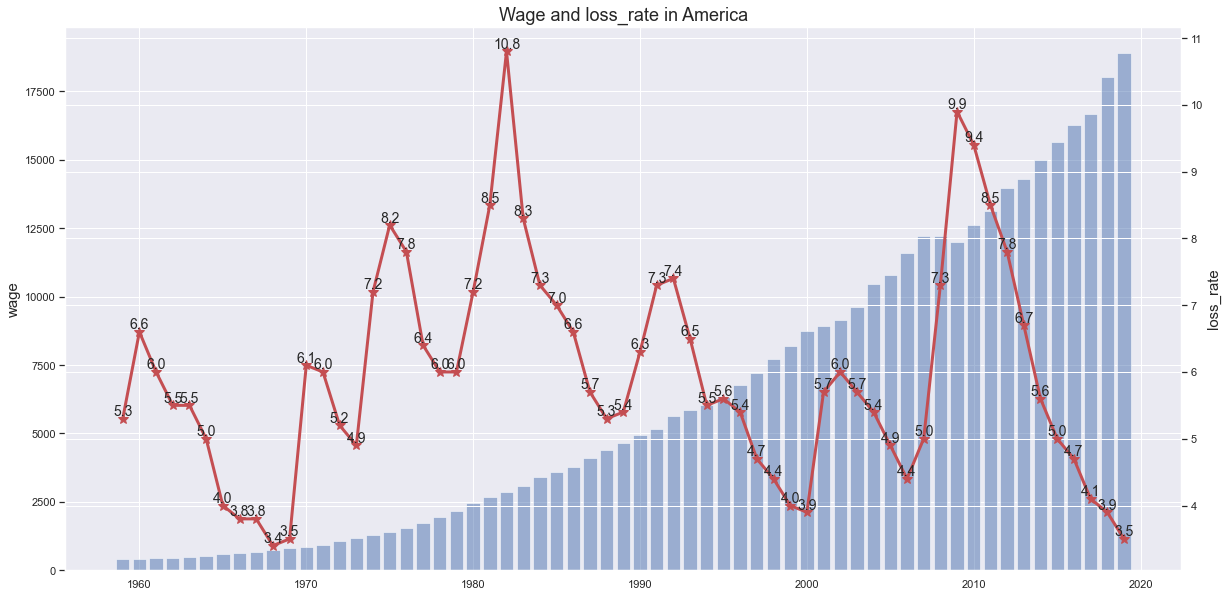

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#设置格式

sns.set()
#取出作图的数据
x = data_tmp["time"]
y1 = data_tmp["wage"]
y2 = data_tmp["loss_rate"]
#设置图形大小
plt.rcParams['figure.figsize'] = (20.0,10.0)
fig = plt.figure()
#画柱形图
ax1 = fig.add_subplot(111)
ax1.bar(x, y1,alpha=.5,color='b')
ax1.set_ylabel('wage',fontsize='15')
#ax1.set_title("数据统计",fontsize='20')
#画折线图 
ax2 = ax1.twinx()   #组合图必须加这个
ax2.plot(x, y2, 'r',ms=20,linewidth=3,marker = '*',markersize = 10)
ax2.set_ylabel('loss_rate',fontsize='15')
plt.title('Wage and loss_rate in America',fontsize = 18)
# 设置数字标签
for a, b in zip(x, y2):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=14)
plt.savefig('/Users/chenyeming/Downloads/new_data/work.svg')
plt.show()


## 税收

In [ ]:
data1 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_财政收入_1980-2020.xlsx')
data2 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/美国_GDP（年度数据1929-2020）.xlsx')
data1['时间'] = list(map(str,list(data1['时间'])))
data1 = data1.drop_duplicates(['时间'])
data2['时间'] = list(map(str,list(data2['时间'])))
data2 = data2.drop_duplicates(['时间'])
data = pd.merge(data1,data2,on = '时间')

data = data[['时间','美国:财政预算收入','美国:GDP:现价']]
data.columns = ['time','tax','gdp']

In [ ]:
data.to_excel('/Users/chenyeming/Downloads/new_data/tax.xlsx')

## 教育

In [ ]:
data1 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/jiaoyu.xlsx')

In [ ]:
data1.dropna(inplace = True)

In [ ]:
data1.columns = ['time','edu']
data1.to_excel('/Users/chenyeming/Downloads/new_data/education.xlsx')

## 环境

In [ ]:
data1 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/export.xlsx')

In [ ]:
data1.columns = ['time','carbon']
data1 = data1.sort_values(by="time" , ascending=False) 

In [ ]:
data1.to_excel('/Users/chenyeming/Downloads/new_data/environment.xlsx')

## 移民

In [ ]:
data1 = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/MPI-Data-Hub_Immigrants_N-Percent-US-Population_2019_0.xlsx')

data1.columns = ['time','immi_percent']
data1 = data1.sort_values(by="time" , ascending=False)

In [ ]:
data1.to_excel('/Users/chenyeming/Downloads/new_data/immigrant.xlsx')

In [ ]:
data1

## 总指标筛选，反正最后筛出来“恰巧”就是有具体政策的

## 筛选方式 聚类降维 主成分分析 评价模型

### 比如有无疫情，设置为01变量、y设为gdp的增长速度（？其实不太合理）

In [ ]:
name_list2 = os.listdir('/Users/chenyeming/Downloads/new_data')

In [ ]:
name_list2

In [ ]:
data1 = pd.read_excel('/Users/chenyeming/Downloads/new_data/tax.xlsx')
del data1['Unnamed: 0']
data2 = pd.read_excel('/Users/chenyeming/Downloads/new_data/finance.xlsx')
del data2['Unnamed: 0']
data3 = pd.read_excel('/Users/chenyeming/Downloads/new_data/work.xlsx')
del data3['Unnamed: 0']
data4 = pd.read_excel('/Users/chenyeming/Downloads/new_data/money.xlsx')
del data4['Unnamed: 0']
data5 = pd.read_excel('/Users/chenyeming/Downloads/new_data/industry.xlsx')
del data5['Unnamed: 0']
data6 = pd.read_excel('/Users/chenyeming/Downloads/new_data/input_output.xlsx')
del data6['Unnamed: 0']
data7 = pd.read_excel('/Users/chenyeming/Downloads/new_data/environment.xlsx')
del data7['Unnamed: 0']
data8 = pd.read_excel('/Users/chenyeming/Downloads/new_data/immigrant.xlsx')
del data8['Unnamed: 0']
data9 = pd.read_excel('/Users/chenyeming/Downloads/new_data/education.xlsx')
del data9['Unnamed: 0']
#data7少5年的

In [ ]:
data5

In [ ]:
data1['time'] = list(map(str,list(data1['time'])))
data2['time'] = list(map(str,list(data2['time'])))
data3['time'] = list(map(str,list(data3['time'])))
data4['time'] = list(map(str,list(data4['time'])))
data5['time'] = list(map(str,list(data5['time'])))
data6['time'] = list(map(str,list(data6['time'])))
data7['time'] = list(map(str,list(data7['time'])))
data8['time'] = list(map(str,list(data8['time'])))
data9['time'] = list(map(str,list(data9['time'])))

In [ ]:
data = pd.merge(data1,data2,on = 'time')
data = pd.merge(data,data3,on = 'time')
data = pd.merge(data,data4,on = 'time')
data = pd.merge(data,data5,on = 'time')
data = pd.merge(data,data6,on = 'time')
data = pd.merge(data,data7,on = 'time')
data = pd.merge(data,data8,on = 'time')
data = pd.merge(data,data9,on = 'time')

In [ ]:
data.columns

In [ ]:
data = data[['time', 'tax', 'loan', 'nation', 'bank', 'wage',
       'loss_rate', 'M1', 'M2', 'rate', 'agriculture',
       'retail', 'manufacturing', 'energy','total', 'output_money', 'input_money', 'output_rate',
       'input_rate', 'Trade difference', 'carbon', 'immi_percent',
       'edu','gdp']]

In [ ]:
data.index = data['time']
del data['time']

In [ ]:
data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def test(df):
    dfData = df.corr()
    plt.subplots(figsize=(16, 16)) # 设置画面大小
    sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Reds")
    plt.savefig('./BluesStateRelation.png')
    plt.show()

In [ ]:
test(data)

In [ ]:
data

In [ ]:

def autoNorm(dataSet):
    minVals = dataSet.min(0) # 取每一列的最小值
    maxVals = dataSet.max(0) # 取每一列的最大值
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet/np.tile(ranges, (m, 1))   
    return normDataSet, ranges, minVals

In [ ]:
new_data, _, _ = autoNorm(data.values)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
import heapq

X = new_data[:,  0:-1]
Y = new_data[:,  -1]

selector = SelectKBest(f_regression,k = 5)
X_new = selector.fit_transform(X, Y)


nums = list(selector.scores_)
max_num_index_list = list(map(nums.index, heapq.nlargest(5, nums)))
print('被挑选的特征是：',list(data.columns[max_num_index_list]))

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression

def c5(x):
    s1=LinearRegression(fit_intercept=True)
    s1.fit(x,Y)
    return s1.score(x,Y)#给出此模型的可决系数，可决系数越大越好

#不同阈值下的方差特征选择，并拟合求对应的可决系数
for i in np.arange(0.,0.17,0.01):
    a1=VarianceThreshold(threshold=i).fit_transform(X)
    print(c5(a1),len(a1[0]))
#特征的选择应用场景：减少训练时间时，需强调模型的可解释性时
#首先特征数量较多时，易出现过拟合，特征选择可防止过拟合

In [ ]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

#Load boston housing dataset as an example
boston = load_boston()
X = new_data[:,  0:-1]
Y = new_data[:,  -1]
names = data.columns

rf = RandomForestRegressor(n_estimators=20, max_depth=4)
scores = []
for i in range(X.shape[1]):
     score = cross_val_score(rf, X[:, i:i+1], Y, scoring="r2",
                              cv=ShuffleSplit(len(X), 3, .3))
     scores.append((round(np.mean(score), 3), names[i]))
print(sorted(scores, reverse=True))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
help(plt.barh)

Help on function barh in module matplotlib.pyplot:

barh(y, width, height=0.8, left=None, *, align='center', **kwargs)
    Make a horizontal bar plot.
    
    The bars are positioned at *y* with the given *align*\ment. Their
    dimensions are given by *width* and *height*. The horizontal baseline
    is *left* (default 0).
    
    Each of *y*, *width*, *height*, and *left* may either be a scalar
    applying to all bars, or it may be a sequence of length N providing a
    separate value for each bar.
    
    Parameters
    ----------
    y : scalar or array-like
        The y coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    width : scalar or array-like
        The width(s) of the bars.
    
    height : sequence of scalars, optional, default: 0.8
        The heights of the bars.
    
    left : sequence of scalars
        The x coordinates of the left sides of the bars (default: 0).
    
    align : {'center', 'edge'}, opt

In [12]:
from matplotlib import cm

In [21]:
mm.reverse()

In [22]:
mm

[100, 99, 90, 63, 58, 39, 30, 15, 10, 7]

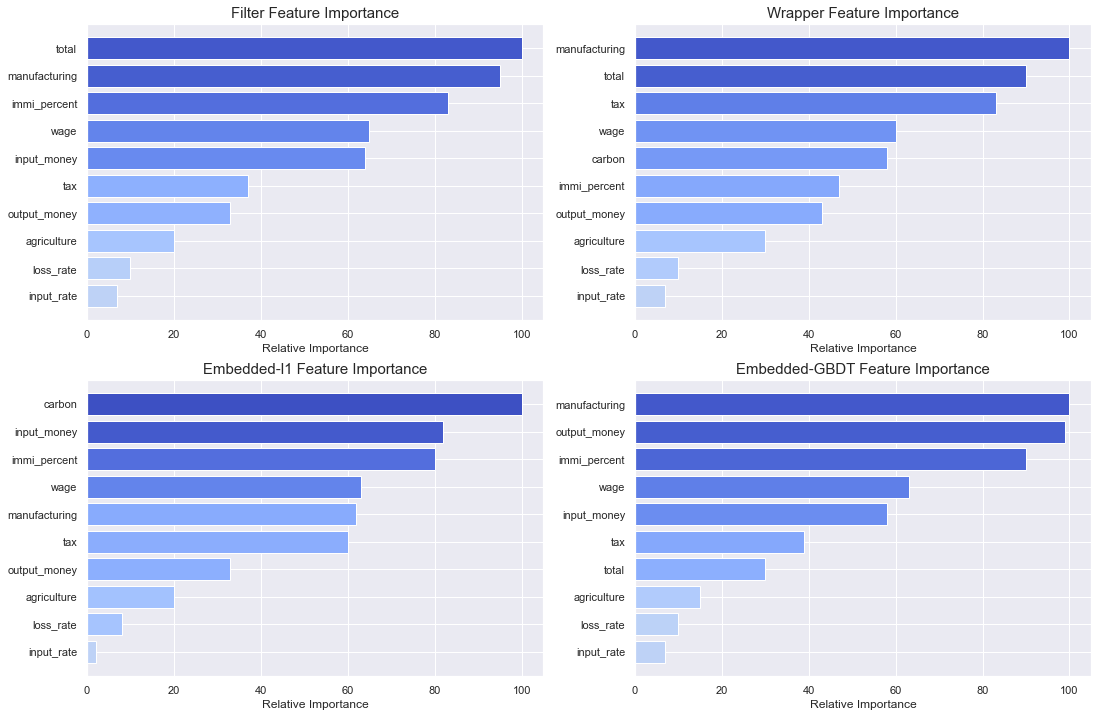

In [88]:
# Adapted from http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
pos = np.arange(10) + .5


map_vir = cm.get_cmap(name='coolwarm')


plt.figure(1, figsize = (18, 12))

plt.subplot(221)


mm = [7,10,20,33,37,64,65,83,95,100]
mm.reverse()
color = map_vir(mm)
mm.reverse()
plt.barh(pos, mm,color = color)
plt.yticks(pos, ['input_rate','loss_rate','agriculture','output_money','tax','input_money','wage','immi_percent','manufacturing','total'])
plt.xlabel('Relative Importance')
plt.title('Filter Feature Importance',fontsize = 15)

plt.subplot(222)
mm = [7,10,30,43,47,58,60,83,90,100]
mm.reverse()
color = map_vir(mm)
mm.reverse()
plt.barh(pos, mm,color = color)
plt.yticks(pos, ['input_rate','loss_rate','agriculture','output_money','immi_percent','carbon','wage','tax','total','manufacturing'])
plt.xlabel('Relative Importance')
plt.title('Wrapper Feature Importance',fontsize = 15)

plt.subplot(223)
mm = [2,8,20,33,60,62,63,80,82,100]
mm.reverse()
color = map_vir(mm)
mm.reverse()
plt.barh(pos, mm,color = color)
plt.yticks(pos, ['input_rate','loss_rate','agriculture','output_money','tax','manufacturing','wage','immi_percent','input_money','carbon'])
plt.xlabel('Relative Importance')
plt.title('Embedded-l1 Feature Importance',fontsize = 15)

plt.subplot(224)
mm =  [7,10,15,30,39,58,63,90,99,100]
mm.reverse()
color = map_vir(mm)
mm.reverse()
plt.barh(pos, mm,color = color)
plt.yticks(pos, ['input_rate','loss_rate','agriculture','total','tax','input_money','wage','immi_percent','output_money','manufacturing'])
plt.xlabel('Relative Importance')
plt.title('Embedded-GBDT Feature Importance',fontsize = 15)

plt.savefig('/Users/chenyeming/Downloads/new_data/pk1.svg')
plt.show()

In [39]:
color[:,-1] = 1

In [40]:
color

array([[0.69913879, 0.64269896, 0.61534025, 1.        ],
       [0.6987697 , 0.6349481 , 0.60426759, 1.        ],
       [0.69815456, 0.62202999, 0.58581315, 1.        ],
       [0.69630911, 0.58327566, 0.53044983, 1.        ],
       [0.69432526, 0.54599769, 0.4805767 , 1.        ],
       [0.68965013, 0.45950788, 0.36603614, 1.        ],
       [0.68841984, 0.4367474 , 0.33589389, 1.        ],
       [0.68823529, 0.30092272, 0.17958478, 1.        ],
       [0.68782007, 0.25594002, 0.13044983, 1.        ],
       [0.68769704, 0.25101884, 0.12552864, 1.        ]])

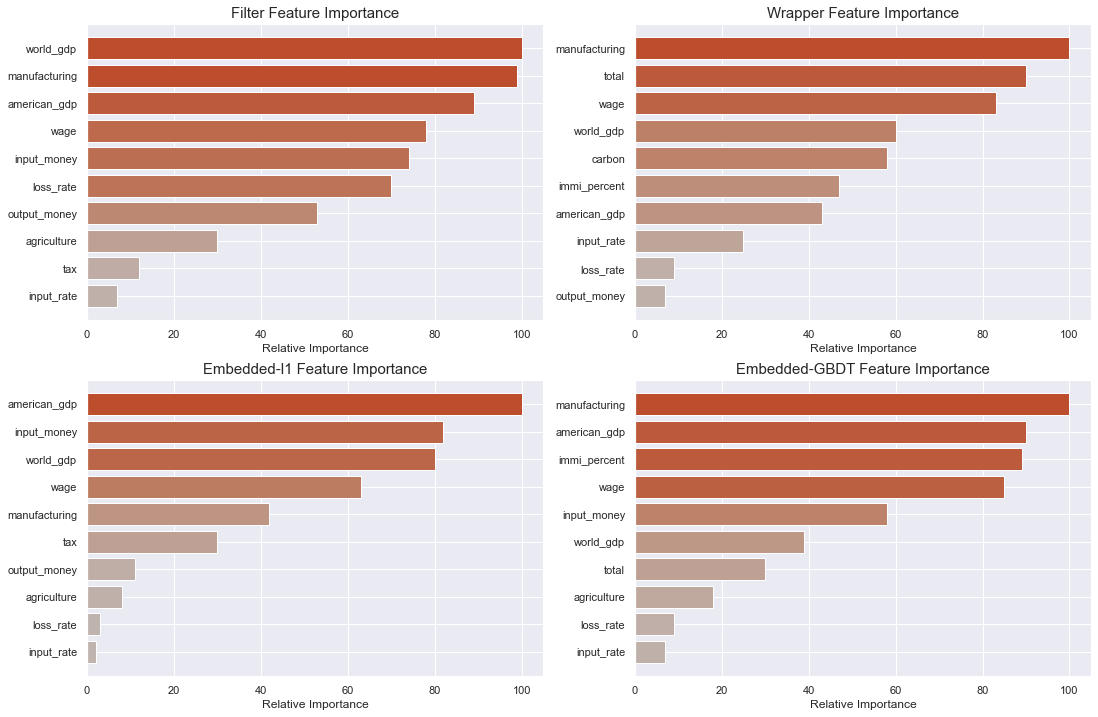

In [89]:
# Adapted from http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
pos = np.arange(10) + .5


map_vir = cm.get_cmap(name='Reds')


plt.figure(1, figsize = (18, 12))

plt.subplot(221)


mm = [7,12,30,53,70,74,78,89,99,100]

color = map_vir(mm)
color = color - 0.25
color[:,-1] = 1
plt.barh(pos, mm,color = color)
plt.yticks(pos, ['input_rate','tax','agriculture','output_money','loss_rate','input_money','wage','american_gdp','manufacturing','world_gdp'])
plt.xlabel('Relative Importance')
plt.title('Filter Feature Importance',fontsize = 15)

plt.subplot(222)
mm = [7,9,25,43,47,58,60,83,90,100]

color = map_vir(mm)
color = color - 0.25
color[:,-1] = 1
plt.barh(pos, mm,color = color)
plt.yticks(pos, ['output_money','loss_rate','input_rate','american_gdp','immi_percent','carbon','world_gdp','wage','total','manufacturing'])
plt.xlabel('Relative Importance')
plt.title('Wrapper Feature Importance',fontsize = 15)

plt.subplot(223)
mm = [2,3,8,11,30,42,63,80,82,100]

color = map_vir(mm)
color = color - 0.25
color[:,-1] = 1
plt.barh(pos, mm,color = color)
plt.yticks(pos, ['input_rate','loss_rate','agriculture','output_money','tax','manufacturing','wage','world_gdp','input_money','american_gdp'])
plt.xlabel('Relative Importance')
plt.title('Embedded-l1 Feature Importance',fontsize = 15)

plt.subplot(224)
mm =  [7,9,18,30,39,58,85,89,90,100]

color = map_vir(mm)
color = color - 0.25
color[:,-1] = 1
plt.barh(pos, mm,color = color)
plt.yticks(pos, ['input_rate','loss_rate','agriculture','total','world_gdp','input_money','wage','immi_percent','american_gdp','manufacturing'])
plt.xlabel('Relative Importance')
plt.title('Embedded-GBDT Feature Importance',fontsize = 15)
plt.savefig('/Users/chenyeming/Downloads/new_data/pk2.svg')
plt.show()

In [ ]:
# Adapted from http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
pos = np.arange(10) + .5

plt.figure(1, figsize = (18, 12))

plt.subplot(221)
plt.barh(pos, [7,10,20,33,37,64,65,83,95,100])
plt.yticks(pos, ['input_rate','loss_rate','agriculture','output_money','tax','input_money','wage','immi_percent','manufacturing','total'])
plt.xlabel('Relative Importance')
plt.title('Filter Feature Importance',fontsize = 15)

plt.subplot(222)
plt.barh(pos, [7,10,30,43,47,58,60,83,90,100])
plt.yticks(pos, ['input_rate','loss_rate','agriculture','output_money','immi_percent','carbon','wage','tax','total','manufacturing'])
plt.xlabel('Relative Importance')
plt.title('Wrapper Feature Importance',fontsize = 15)

plt.subplot(223)
plt.barh(pos, [2,8,20,33,60,62,63,80,82,100])
plt.yticks(pos, ['input_rate','loss_rate','agriculture','output_money','tax','manufacturing','wage','immi_percent','input_money','carbon'])
plt.xlabel('Relative Importance')
plt.title('Embedded-l1 Feature Importance',fontsize = 15)

plt.subplot(224)
plt.barh(pos, [7,10,15,30,39,58,63,90,99,100])
plt.yticks(pos, ['input_rate','loss_rate','agriculture','total','tax','input_money','wage','immi_percent','output_money','manufacturing'])
plt.xlabel('Relative Importance')
plt.title('Embedded-GBDT Feature Importance',fontsize = 15)

plt.show()

In [ ]:
sorted(scores, reverse=True)

In [ ]:
#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, names = None, sort = False):
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

boston = load_boston()
scaler = StandardScaler()
X = scaler.fit_transform(data[["manufacturing",'carbon','immi_percent','input_money','tax']])
Y = scaler.fit_transform(np.array(data["gdp"]).reshape(-1,1)).reshape(-1)
names = ["manufacturing",'carbon','immi_percent','input_money','tax']

lasso = Lasso(alpha=.3)
lasso.fit(X, Y)

print("Lasso model: GDP =", pretty_print_linear(lasso.coef_, names, sort = True))

## 政策量化

In [ ]:
# 我们找到一些政策 然后找到他们确实明显影响了什么指标，
#比如a政策对税收增加了15%幅度，然后我们就可以在20年基础之上去推到21，22，23，24年的税收
#其他以此类推
#从而我们能够得到两组预测数据，川普的经济发展结果；拜登影响结果。川普发展好一些。

##### 税收

In [ ]:
八十年代，美国总统罗纳德·里根把税收改革作为他总统任期内的一个核心任务。 1984
他坚信供给方经济学的一个观点，该观点认为，较低税负能鼓励工作和储蓄。
因此，《1981年经济复苏和税收法案》削减了商业税，把最高边际税率降低到50%。
里程碑式的《1986年税收改革法案》把最高边际税率进一步降低到28%。
该法案还结束了个人消费信贷和助学贷款利息的税收扣除，并且消除了税法中的一些特殊规定和漏洞。

In [ ]:
1990年，美国总统乔治·H·W·布什和国会一致同意增税，以削减八十年代大幅增长的预算赤字。最高边际税率提升到31%。1993年，
国会通过了总统比尔·克林顿的赤字削减议案，大幅增收企业税，
增加了向穷人的税收返还，提高了高收入者的税率。个人所得税最高边际税率提升到39.6%。

In [91]:
tax = pd.read_excel('/Users/chenyeming/Downloads/new_data/tax.xlsx')
del tax['Unnamed: 0']

In [92]:
tax['rate'] = np.array(tax['tax']) / np.array(tax['gdp'])

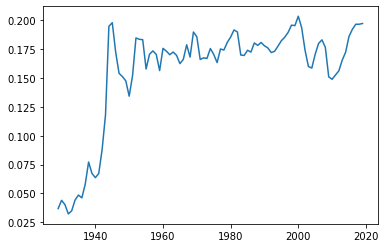

In [8]:
plt.plot(tax['time'],tax['rate'])

In [77]:
tax[:40]

,time,tax,gdp,rate
0,2019,4226.00,21427.1,0.197227
1,2018,4030.00,20500.6,0.196580
2,2017,3811.00,19386.8,0.196577
3,2016,3568.00,18566.9,0.192170
4,2015,3337.00,17937.8,0.186032
5,2014,3002.00,17418.9,0.172342
6,2013,2775.00,16768.1,0.165493
7,2012,2450.16,15684.8,0.156212
8,2011,2303.47,15094.0,0.152608
9,2010,2162.71,14526.5,0.148880


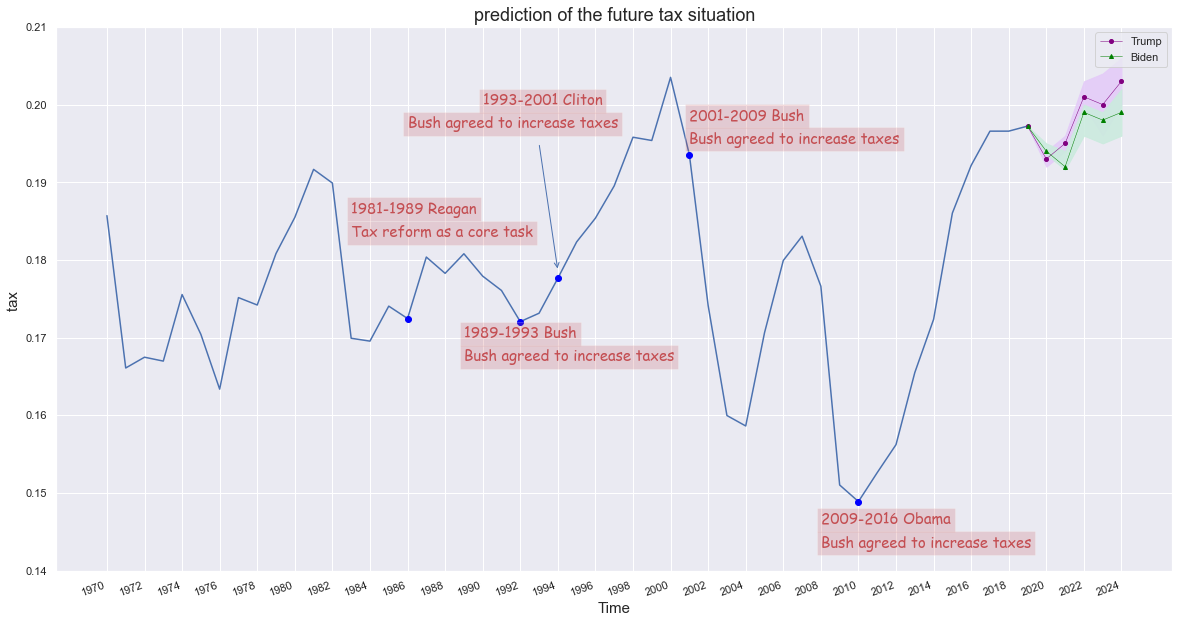

In [94]:
plt.plot(tax['time'][:50],tax['rate'][:50])
plt.plot([2019,2020,2021,2022,2023,2024],[0.197227,0.193,0.195,0.201,0.200,0.203],color='purple', lw=0.5, ls='-', marker='o', ms=4,label = 'Trump')
plt.plot([2019,2020,2021,2022,2023,2024],[0.197227,0.194,0.192,0.199,0.198,0.199], color='green', lw=0.5,  marker='^', ms=4, label = 'Biden')
plt.fill_between([2019,2020,2021,2022,2023,2024], [0.197227,0.192,0.194,0.1998,0.196,0.200], [0.197227,0.194,0.196,0.203,0.204,0.206], color=(229/256, 204/256, 249/256), alpha=0.9)
plt.fill_between([2019,2020,2021,2022,2023,2024], [0.197227,0.1936,0.1916,0.196,0.195,0.196], [0.197227,0.195,0.194,0.2,0.199,0.202], color=(204/256, 236/256, 223/256), alpha=0.9)

plt.plot([1986,1992,1994,2001,2010],[0.172451,0.172053,0.177634,0.193568,0.148880],'o',color='blue', ms=6)
plt.annotate("",xy=(1994,0.178634),xytext=(1993,0.195),color="blue",weight="bold",
arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="b"))


plt.text(1983, 0.186, "1981-1989 Reagan", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)
plt.text(1983, 0.183, "Tax reform as a core task", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.text(1989, 0.170, "1989-1993 Bush", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)
plt.text(1989, 0.167, "Bush agreed to increase taxes", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.text(1990, 0.200, "1993-2001 Cliton", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)
plt.text(1986, 0.197, "Bush agreed to increase taxes", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.text(2001, 0.198, "2001-2009 Bush", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)
plt.text(2001, 0.195, "Bush agreed to increase taxes", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.text(2008, 0.146, "2009-2016 Obama", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)
plt.text(2008, 0.143, "Bush agreed to increase taxes", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.xlabel('Time',fontsize = 15)
plt.ylabel('tax ',fontsize = 15)
plt.title('prediction of the future tax situation',fontsize = 18)
#设置坐标轴刻度
my_x_ticks = np.arange(1970, 2025, 2)
my_y_ticks = np.arange(0.14, 0.22, 0.01)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.xticks(rotation=20)
plt.xticks(horizontalalignment='right')

plt.legend()
plt.savefig('/Users/chenyeming/Downloads/new_data/predict1.svg')
plt.show()

In [95]:
immigrant = pd.read_excel('/Users/chenyeming/Downloads/new_data/immigrant.xlsx')
del immigrant['Unnamed: 0']

In [ ]:
immigrant

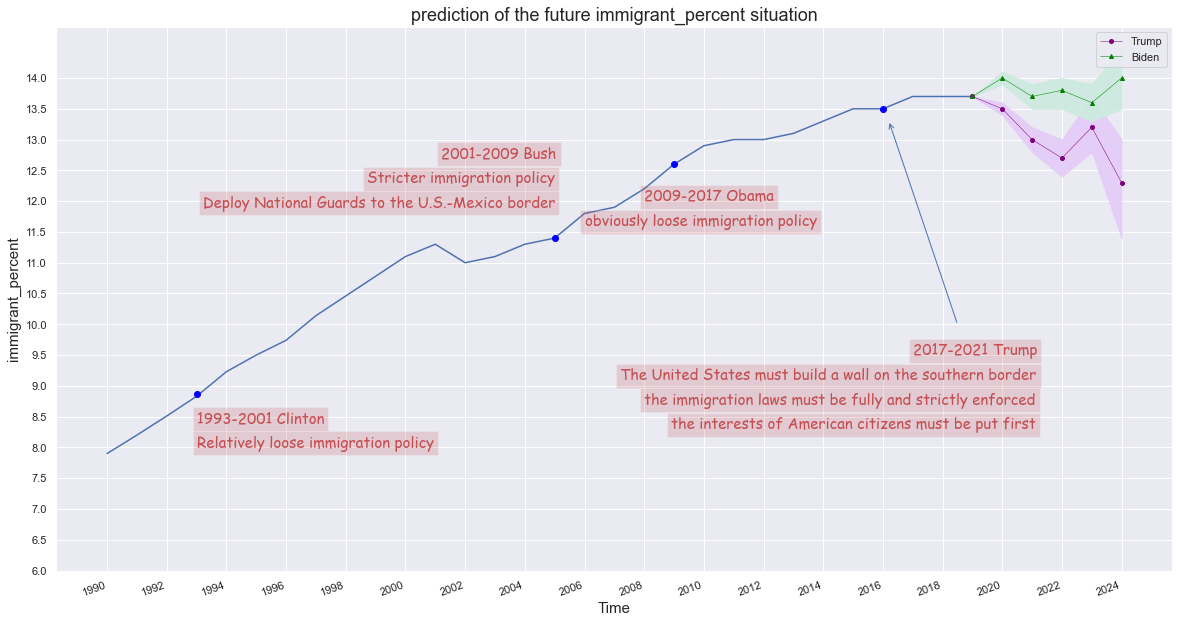

In [96]:
plt.rcParams['figure.figsize'] = (20.0,10.0)
plt.plot(immigrant['time'][:30],immigrant['immi_percent'][:30])
plt.plot([2019,2020,2021,2022,2023,2024],[13.7,13.5,13.0,12.7,13.2,12.3],color='purple', lw=0.5, ls='-', marker='o', ms=4,label = 'Trump')
plt.plot([2019,2020,2021,2022,2023,2024],[13.7,14.0,13.7,13.8,13.6,14.0], color='green', lw=0.5,  marker='^', ms=4, label = 'Biden')
plt.fill_between([2019,2020,2021,2022,2023,2024], [13.7,13.4,12.8,12.4,12.8,11.4], [13.7,13.6,13.2,13.0,13.7,13.0], color=(229/256, 204/256, 249/256), alpha=0.9)
plt.fill_between([2019,2020,2021,2022,2023,2024], [13.7,13.9,13.5,13.5,13.3,13.5], [13.7,14.1,13.9,14.0,13.9,14.5], color=(204/256, 236/256, 223/256), alpha=0.9)

plt.plot([1993,2005,2009,2016],[8.86,11.4,12.6,13.5],'o',color='blue', ms=6)
plt.annotate("",xy=(2016.2,13.3),xytext=(2018.5,10),color="blue",weight="bold",
arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="b"))

plt.text(1993, 8.4, "1993-2001 Clinton", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)
plt.text(1993, 8, "Relatively loose immigration policy", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.text(2001.2, 12.7, "2001-2009 Bush", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.text(1998.7, 12.3, "Stricter immigration policy", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)
plt.text(1993.2, 11.9, "Deploy National Guards to the U.S.-Mexico border", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)


plt.text(2008, 12.0, "2009-2017 Obama", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)
plt.text(2006, 11.6, "obviously loose immigration policy", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)


plt.text(2017, 9.5, "2017-2021 Trump", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)
plt.text(2007.2, 9.1, "The United States must build a wall on the southern border", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)
plt.text(2008.0, 8.7, "the immigration laws must be fully and strictly enforced", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)
plt.text(2008.9, 8.3, "the interests of American citizens must be put first", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.xlabel('Time',fontsize = 15)
plt.ylabel('immigrant_percent',fontsize = 15)
plt.title('prediction of the future immigrant_percent situation',fontsize = 18)
#设置坐标轴刻度
my_x_ticks = np.arange(1990, 2025, 2)
my_y_ticks = np.arange(6, 14.5, 0.5)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.xticks(rotation=20)
plt.xticks(horizontalalignment='right')

plt.legend()

plt.savefig('/Users/chenyeming/Downloads/new_data/predict2.svg')
plt.show()

In [97]:
environment = pd.read_excel('/Users/chenyeming/Downloads/new_data/environment.xlsx')
del environment['Unnamed: 0']

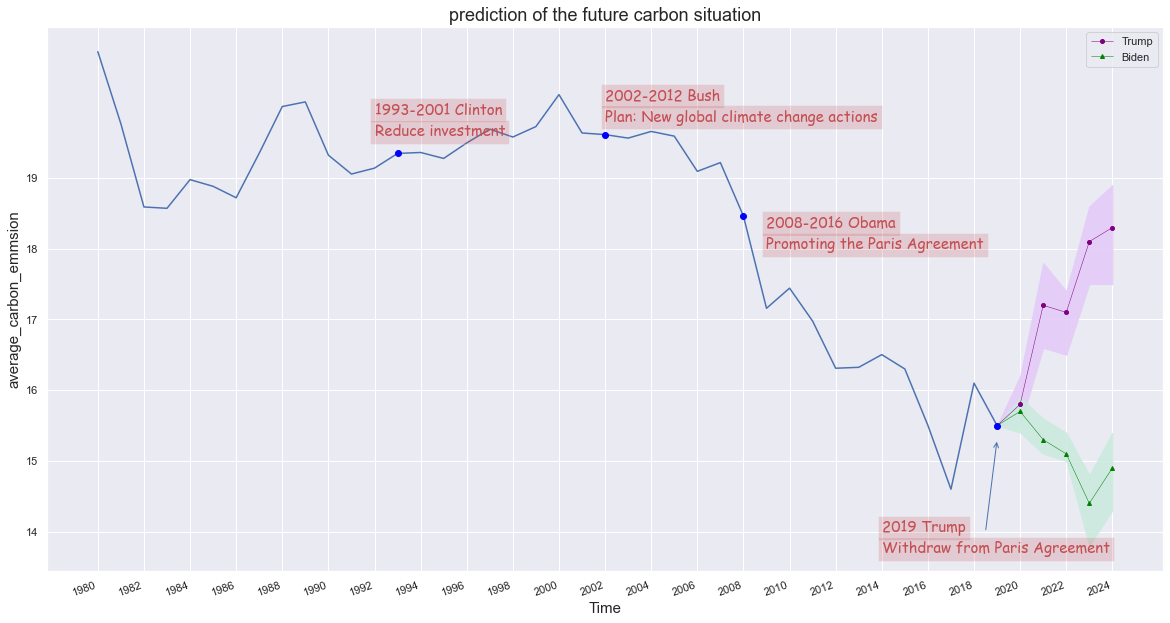

In [98]:
plt.plot(environment['time'][:40],environment['carbon'][:40])
plt.plot([2019,2020,2021,2022,2023,2024],[15.5,15.8,17.2,17.1,18.1,18.3],color='purple', lw=0.5, ls='-', marker='o', ms=4,label = 'Trump')
plt.plot([2019,2020,2021,2022,2023,2024],[15.5,15.7,15.3,15.1,14.4,14.9], color='green', lw=0.5,  marker='^', ms=4, label = 'Biden')
plt.fill_between([2019,2020,2021,2022,2023,2024], [15.5,15.5,16.6,16.5,17.5,17.5], [15.5,16.2,17.8,17.4,18.6,18.9], color=(229/256, 204/256, 249/256), alpha=0.9)
plt.fill_between([2019,2020,2021,2022,2023,2024], [15.5,15.4,15.1,15.0,13.8,14.3], [15.5,15.9,15.6,15.4,14.8,15.4], color=(204/256, 236/256, 223/256), alpha=0.9)
plt.text(2009, 18, "Promoting the Paris Agreement", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)
plt.text(2009, 18.3, "2008-2016 Obama", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)
plt.plot([1993,2002,2008,2019],[19.347083,19.613404,18.461764,15.5],'o',color='blue', ms=6)
plt.annotate("",xy=(2019,15.3),xytext=(2018.5,14),color="blue",weight="bold",
arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="b"))

plt.text(2014, 14, "2019 Trump", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.text(2014, 13.7, "Withdraw from Paris Agreement", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.text(2002, 20.1, "2002-2012 Bush", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.text(2002, 19.8, "Plan: New global climate change actions", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.text(1992, 19.9, "1993-2001 Clinton", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.text(1992, 19.6, "Reduce investment", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.xlabel('Time',fontsize = 15)
plt.ylabel('average_carbon_emmsion',fontsize = 15)
plt.title('prediction of the future carbon situation',fontsize = 18)
#设置坐标轴刻度
my_x_ticks = np.arange(1980, 2025, 2)
my_y_ticks = np.arange(14, 20, 1)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.xticks(rotation=20)
plt.xticks(horizontalalignment='right')

plt.legend()
plt.savefig('/Users/chenyeming/Downloads/new_data/predict3.svg')
plt.show()

In [1]:
import pandas as pd

In [2]:
input_output = pd.read_excel('/Users/chenyeming/Downloads/new_data/input_output.xlsx')
del input_output['Unnamed: 0']

FileNotFoundError: [Errno 2] No such file or directory: '/Users/chenyeming/Downloads/new_data/input_output.xlsx'

In [ ]:
input_output

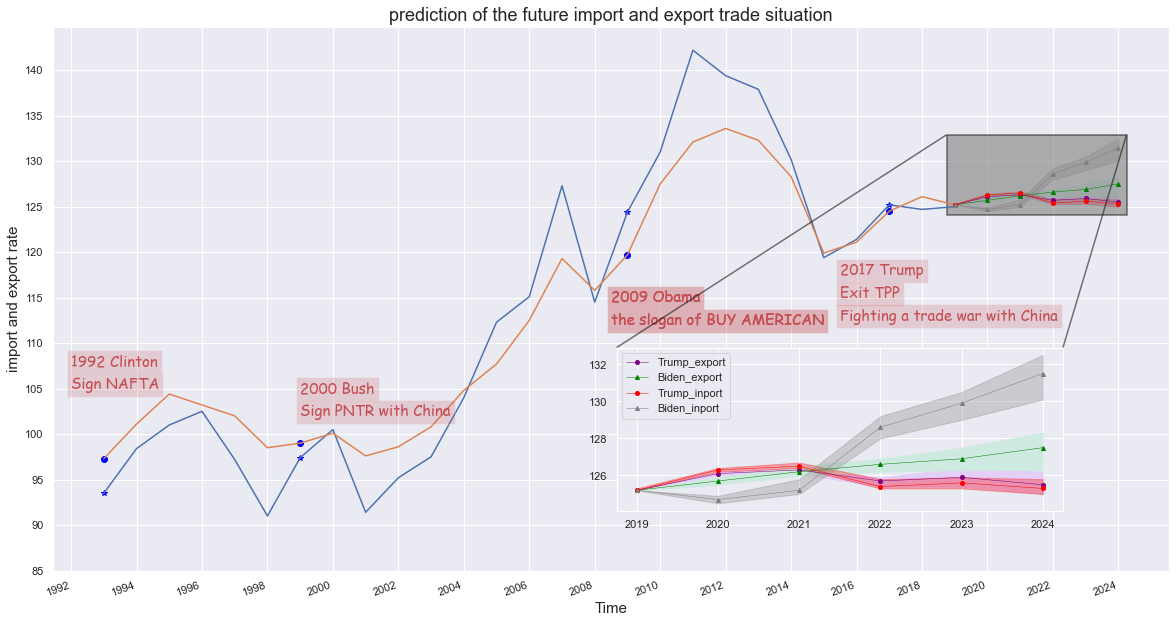

In [100]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# 准备数据
x = np.linspace(-0.1*np.pi, 2*np.pi, 30)
y_1 = np.sinc(x)+0.7
y_2 = np.tanh(x)
y_3 = np.exp(-np.sinc(x))


# 绘图
fig, ax = plt.subplots(1, 1)
plt.plot([1993,1999,2009,2017],[97.3,99,119.7,124.5],'o',color='blue', ms=6)
plt.plot([1993,1999,2009,2017],[93.5,97.4,124.4,125.2],'*',color='blue', ms=6)
plt.plot(input_output['time'],input_output['input_rate'],label = 'input')
plt.plot(input_output['time'],input_output['output_rate'], label = 'output')
plt.plot([2019,2020,2021,2022,2023,2024],[125.2,126.1,126.3,125.7,125.9,125.5],color='purple', lw=0.5, ls='-', marker='o', ms=4,label = 'Trump_export')
plt.plot([2019,2020,2021,2022,2023,2024],[125.2,125.7,126.2,126.6,126.9,127.5], color='green', lw=0.5,  marker='^', ms=4, label = 'Biden_export')
plt.fill_between([2019,2020,2021,2022,2023,2024], [125.2,126.0,126.1,125.4,125.4,125.0], [125.2,126.2,126.4,125.9,126.4,126.2], color=(229/256, 204/256, 249/256), alpha=0.9)
plt.fill_between([2019,2020,2021,2022,2023,2024], [125.2,125.5,126.0,126.2,126.3,126.3], [125.2,125.9,126.5,126.9,127.5,128.3], color=(204/256, 236/256, 223/256), alpha=0.9)


plt.plot([2019,2020,2021,2022,2023,2024],[125.2,126.3,126.5,125.4,125.6,125.3],color='red', lw=0.5, ls='-', marker='o', ms=4,label = 'Trump_inport')
plt.plot([2019,2020,2021,2022,2023,2024],[125.2,124.7,125.2,128.6,129.9,131.5], color='gray', lw=0.5,  marker='^', ms=4, label = 'Biden_inport')
plt.fill_between([2019,2020,2021,2022,2023,2024], [125.2,126.2,126.4,125.3,125.3,125.0], [125.3,126.4,126.7,125.8,125.9,125.8], color='red', alpha=0.3)
plt.fill_between([2019,2020,2021,2022,2023,2024], [125.2,124.5,125.0,128.0,129.0,130.1], [125.2,124.9,125.8,129.2,130.5,132.5], color='gray', alpha=0.3)

plt.text(1992, 107.5, "1992 Clinton", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.text(1992, 105, "Sign NAFTA", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.text(1999, 104.5, "2000 Bush", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.text(1999, 102, "Sign PNTR with China", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.text(2008.5, 114.5, "2009 Obama", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.text(2008.5, 112, "the slogan of BUY AMERICAN", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.text(2008.5, 114.5, "2009 Obama", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.text(2008.5, 112, "the slogan of BUY AMERICAN", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.text(2015.5, 117.5, "2017 Trump", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.text(2015.5, 115, "Exit TPP", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.text(2015.5, 112.5, "Fighting a trade war with China", size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2),wrap=True)

plt.xlabel('Time',fontsize = 15)
plt.ylabel('import and export rate',fontsize = 15)
plt.title('prediction of the future import and export trade situation',fontsize = 18)
#设置坐标轴刻度
my_x_ticks = np.arange(1992, 2025, 2)
my_y_ticks = np.arange(85, 145, 5)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.xticks(rotation=20)
plt.xticks(horizontalalignment='right')


# 嵌入绘制局部放大图的坐标系
axins = inset_axes(ax, width="40%", height="30%",loc='lower left',
                   bbox_to_anchor=(0.5, 0.1, 1, 1),
                   bbox_transform=ax.transAxes)

# 在子坐标系中绘制原始数据
axins.plot([2019,2020,2021,2022,2023,2024],[125.2,126.1,126.3,125.7,125.9,125.5],color='purple', lw=0.5, ls='-', marker='o', ms=4,label = 'Trump_export')
axins.plot([2019,2020,2021,2022,2023,2024],[125.2,125.7,126.2,126.6,126.9,127.5], color='green', lw=0.5,  marker='^', ms=4, label = 'Biden_export')
axins.fill_between([2019,2020,2021,2022,2023,2024], [125.2,126.0,126.1,125.4,125.4,125.0], [125.2,126.2,126.4,125.9,126.4,126.2], color=(229/256, 204/256, 249/256), alpha=0.9)
axins.fill_between([2019,2020,2021,2022,2023,2024], [125.2,125.5,126.0,126.2,126.3,126.3], [125.2,125.9,126.5,126.9,127.5,128.3], color=(204/256, 236/256, 223/256), alpha=0.9)

axins.plot([2019,2020,2021,2022,2023,2024],[125.2,126.3,126.5,125.4,125.6,125.3],color='red', lw=0.5, ls='-', marker='o', ms=4,label = 'Trump_inport')
axins.plot([2019,2020,2021,2022,2023,2024],[125.2,124.7,125.2,128.6,129.9,131.5], color='gray', lw=0.5,  marker='^', ms=4, label = 'Biden_inport')
axins.fill_between([2019,2020,2021,2022,2023,2024], [125.2,126.2,126.4,125.3,125.3,125.0], [125.3,126.4,126.7,125.8,125.9,125.8], color='red', alpha=0.3)
axins.fill_between([2019,2020,2021,2022,2023,2024], [125.2,124.5,125.0,128.0,129.0,130.1], [125.2,124.9,125.8,129.2,130.5,132.5], color='gray', alpha=0.3)

# 建立父坐标系与子坐标系的连接线
# loc1 loc2: 坐标系的四个角
# 1 (右上) 2 (左上) 3(左下) 4(右下)
mark_inset(ax, axins, loc1=1, loc2=2, fc="gray", alpha = 0.6,ec='k', lw=1.5)

plt.legend()
plt.savefig('/Users/chenyeming/Downloads/new_data/predict4.svg')
plt.show()

In [ ]:
help(mark_inset)

In [ ]:
x

In [ ]:
#在图形中添加指示
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(0.05,10,1000)
y=np.sin(x)
plt.plot(x,y,label="plot figure",ls=":",c="red",lw=2)
plt.legend()
#xy被注释图形内容位置坐标，xytext注释文本的位置坐标，color注释文本的颜色。arrowprops指示被注释内容的箭头的属性字典
plt.annotate("maxmin",xy=(np.pi/2,1.0),xytext=((np.pi/2)+1,0.8),color="blue",weight="bold",
arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="b"))
#添加无指示标记文本注释
plt.text(4.10,0.09,"y=sin(x)",weight="bold",color="green")
plt.xlabel("x-axis",fontsize=15)
plt.ylabel("y-axis",fontsize=15)
plt.title("y=sin(x)",fontsize=15)

plt.show()

## 博弈论

In [ ]:
#博弈论的随便扯一扯

##### 特征设计

In [ ]:
#设计出一些新的特征。比如扯出根据博弈论的结果，我们将美国经济的gdp的增速的变化量作为一个新的指标。

In [ ]:
#国际对华态度，这是一个多博弈问题。所以我们必须加特征

In [ ]:
#然后对中国的影响上，照常分析。我们觉得对国内国外的影响特征是不一样的，所以我们重新进行特征选择。但是这时候我们需要加入博弈因素

In [ ]:
china = pd.read_excel('/Users/chenyeming/Downloads/美国经济统计数据1980-2020/美国经济统计数据/中国gdp.xlsx')

In [ ]:
data_china = copy.deepcopy(data)
data_china['gdp'] = list(china['gdp'])[:len(data_china)]

In [ ]:
#再次进行特征筛选

In [ ]:

def autoNorm(dataSet):
    minVals = dataSet.min(0) # 取每一列的最小值
    maxVals = dataSet.max(0) # 取每一列的最大值
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet/np.tile(ranges, (m, 1))   
    return normDataSet, ranges, minVals

In [ ]:
new_data, _, _ = autoNorm(data_china.values)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
import heapq

X = new_data[:,  0:-1]
Y = new_data[:,  -1]

selector = SelectKBest(f_regression,k = 5)
X_new = selector.fit_transform(X, Y)


nums = list(selector.scores_)
max_num_index_list = list(map(nums.index, heapq.nlargest(5, nums)))
print('被挑选的特征是：',list(data_china.columns[max_num_index_list]))

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression

def c5(x):
    s1=LinearRegression(fit_intercept=True)
    s1.fit(x,Y)
    return s1.score(x,Y)#给出此模型的可决系数，可决系数越大越好

#不同阈值下的方差特征选择，并拟合求对应的可决系数
for i in np.arange(0.,0.17,0.01):
    a1=VarianceThreshold(threshold=i).fit_transform(X)
    print(c5(a1),len(a1[0]))
#特征的选择应用场景：减少训练时间时，需强调模型的可解释性时
#首先特征数量较多时，易出现过拟合，特征选择可防止过拟合

In [ ]:
help(VarianceThreshold)

In [ ]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

#Load boston housing dataset as an example
boston = load_boston()
X = new_data[:,  0:-1]
Y = new_data[:,  -1]
names = data.columns

rf = RandomForestRegressor(n_estimators=20, max_depth=4)
scores = []
for i in range(X.shape[1]):
     score = cross_val_score(rf, X[:, i:i+1], Y, scoring="r2",
                              cv=ShuffleSplit(len(X), 3, .3))
     scores.append((round(np.mean(score), 3), names[i]))
print(sorted(scores, reverse=True))

In [ ]:
#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, names = None, sort = False):
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

boston = load_boston()
scaler = StandardScaler()
X = scaler.fit_transform(data[["manufacturing",'carbon','immi_percent','input_money','tax']])
Y = scaler.fit_transform(np.array(data["gdp"]).reshape(-1,1)).reshape(-1)
names = ["manufacturing",'carbon','immi_percent','input_money','tax']

lasso = Lasso(alpha=.3)
lasso.fit(X, Y)

print("Lasso model: GDP =", pretty_print_linear(lasso.coef_, names, sort = True))

## 最后一问联系世界提出一些建议

In [ ]:
#世界gdp概述和分析

In [ ]:
pd.read_excel('/Users/chenyeming/Downloads/GDP/API_NY.GDP.MKTP.CD_DS2_zh_excel_v2_103680.xls')

In [ ]:
gdp

In [ ]:
#coding=utf-8

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys

def is_country(x, fields):
  for field in fields:
    if field in x.encode("utf-8"):
      return False
  return True


gdp = pd.read_excel("/Users/chenyeming/Downloads/GDP/API_NY.GDP.MKTP.CD_DS2_zh_excel_v2_103680.xls")


# 筛选：去掉世界、一些地区性的数据
fields = ["世界", "收入国家", "地区", "南亚", "组织成员", "人口","北美", "联盟", "IBRD", "IDA", "重债穷国"]
gdp["is_country"] = gdp.apply(lambda x: is_country(x["Country Name"], fields), axis = 1)
gdp = gdp[gdp["is_country"] == True]

In [ ]:

datas = []
for year in range(1960, 2019):
year = str(year)
gdp.sort_values(year, inplace = True, ascending = False)
print(year,"==========================================")
print(gdp[0:15][["Country Name", year]])

data = gdp[0:15] #排序，取前15名
data.sort_values(year, inplace = True, ascending = True)
data[year] = data[year] / 10 ** 11

datas.append([year, data[year].tolist(), data["Country Name"].tolist()])

In [ ]:
#covid-19这个大问题

In [ ]:
pip install pyecharts -i https://pypi.tuna.tsinghua.edu.cn/simple

In [3]:
from pyecharts import Map
 
value = [95.1, 23.2, 43.3, 66.4, 88.5]
attr = ["China", "Canada", "Brazil", "Russia", "United States"]
map0 = Map("世界地图示例", width=1200, height=600)
map0.add("世界地图", attr, value, maptype="world",  is_visualmap=True, visual_text_color='#000')
map0.render(path="世界地图.html")

ImportError: cannot import name 'Map' from 'pyecharts' (/Users/chenyeming/opt/anaconda3/lib/python3.8/site-packages/pyecharts/__init__.py)

In [ ]:
import pyecharts

In [ ]:
dir(pyecharts)